# Examples of use of psychofit toolbox

### Summary:
Example 1: Fit data from 0 to 1 and stimulus in log units, using erf<br>
Example 2: Fit data from 0 to 1 and stimulus in linear units, using erf<br>
Example 3: Same, with two different lapse rates<br>
Example 4: Fit data from .5 to 1, using weibull

### Advanced: 
Add error bars to data, parameters, and fits

In [1]:
import psychofit as psy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
help(psy)

Help on module psychofit:

NAME
    psychofit

DESCRIPTION
    The psychofit toolbox contains tools to fit two-alternative psychometric
    data. The fitting is done using maximal likelihood estimation: one
    assumes that the responses of the subject are given by a binomial
    distribution whose mean is given by the psychometric function.
    
    The data can be expressed in fraction correct (from 50 to 100%) or in
    fraction of one specific choice (from 0 to 100%). To fit them you can use
    these functions:
      weibull50          - Weibull function from 0.5 to 1, with lapse rate
      weibull            - Weibull function from 0 to 1, with lapse rate
      erf_psycho         - erf function from 0 to 1, with lapse rate
      erf_psycho_2gammas - erf function from 0 to 1, wiht two lapse rates
    
    Functions in the toolbox are:
      mle_fit_psycho     - Maximumum likelihood fit of psychometric function
      neg_likelihood     - Negative likelihood of a psychometric functi

## Example 1
Fit data from 0 to 1 and stimulus in log units, using erf 

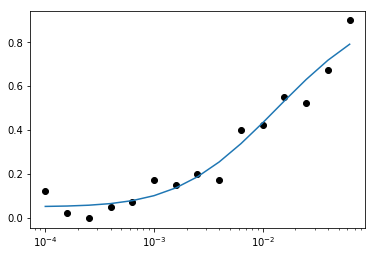

In [2]:
# stimulus values vary logarithmically (we will take the log when fitting)
xx = 10**np.arange(-4,-1,.2)
nxx = xx.size

# actual parameters of the observer
threshold = -2.
slope = 1.
gamma = .05

# fake experimental data given those parameters
pp = psy.erf_psycho([threshold, slope, gamma], np.log10(xx))
ntrials = 40
dd = np.random.binomial(1, pp, size=(ntrials,nxx))

# fit to reconstruct the parameters
data = np.vstack((np.log10(xx), 10*np.ones((nxx,)), np.mean(dd, axis=0)))
pars, L = psy.mle_fit_psycho(data, 'erf_psycho');

plt.semilogx(xx, np.mean(dd, axis=0), 'ko')
plt.semilogx(xx, psy.erf_psycho(pars,np.log10(xx)), '-')
plt.show()

## Example 2
Fit data from 0 to 1 and stimulus in linear units, using erf

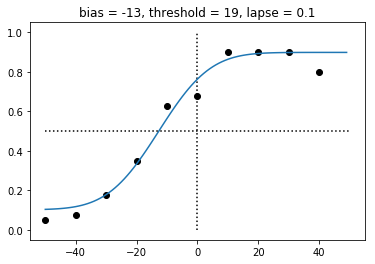

In [3]:
# stimulus values
xx = np.arange(-50,50,10)
nxx = xx.size

# actual parameters of the observer
bias = -10.
threshold = 20.
gamma = .1

# fake experimental data given those parameters
pp = psy.erf_psycho([bias, threshold, gamma],xx)
ntrials = 40;
dd = np.random.binomial(1, pp, size=(ntrials,nxx))

# fit it
data = np.vstack((xx, ntrials*np.ones((nxx,)), np.mean(dd, axis=0)))
pars, L = psy.mle_fit_psycho(data, 'erf_psycho', 
            np.array([0., 20., 0.1]), np.array([-20., 10., 0.]), np.array([20., 40., .3]), 10);

# graphics
plt.plot(xx,np.mean(dd, axis=0),'ko',mfc='k')
plt.plot((0,0),(0,1),'k:')
plt.plot(np.arange(-50,50), psy.erf_psycho( pars, np.arange(-50,50) ))
plt.plot((-50, 50),(.5, .5),'k:')
plt.title('bias = {:2.0f}, threshold = {:2.0f}, lapse = {:.01f}'.format(*pars))
plt.show()

## Example 3
Same, with two different lapse rates

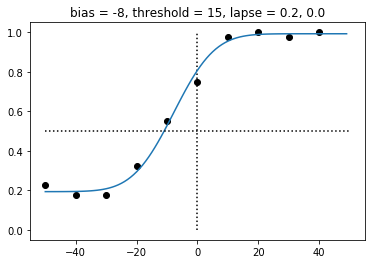

In [4]:
# stimulus values
xx = np.arange(-50,50,10)
nxx = xx.size

# actual parameters of the observer
bias = -10.
threshold = 20.
gamma1 = .2
gamma2 = 0.

# fake experimental data given those parameters
pp = psy.erf_psycho_2gammas([bias, threshold, gamma1, gamma2],xx)
ntrials = 40;
dd = np.random.binomial(1, pp, size=(ntrials,nxx))

# fit it
data = np.vstack((xx, ntrials*np.ones((nxx,)), np.mean(dd, axis=0)))
pars, L = psy.mle_fit_psycho(data, 'erf_psycho_2gammas', 
            np.array([0., 20., .1, .1]), np.array([-20., 10., 0., 0.]), np.array([20., 40., .3, .3]), 10);

# graphics
plt.plot(xx,np.mean(dd, axis=0),'ko',mfc='k')
plt.plot((0,0),(0,1),'k:')
plt.plot(np.arange(-50,50), psy.erf_psycho_2gammas( pars, np.arange(-50,50) ))
plt.plot((-50, 50),(0.5, 0.5),'k:')
plt.title('bias = {:2.0f}, threshold = {:2.0f}, lapse = {:.01f}, {:.01f}'.format(*pars))
plt.show()

## Example 4
Fit data from .5 to 1, using weibull

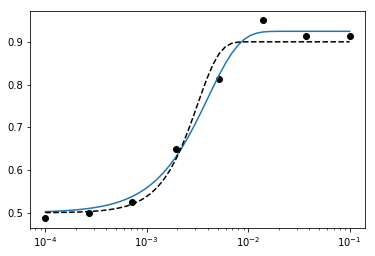

In [5]:
# stimulus values
nxx = 8
xx = 10**np.linspace(-4,-1,nxx)

# actual parameters of the observer
alpha = 10**-2.5
beta = 2.
gamma = 0.1

# fake experimental data given those parameters
pp = psy.weibull50([alpha, beta, gamma], xx)
ntrials = 80
dd = np.random.binomial(1., pp, size=(ntrials,nxx))
# fit to reconstruct the parameters (notice we do NOT take log of x values)
data = np.vstack((xx, ntrials*np.ones((nxx,)), np.mean(dd, axis=0)))
pars, L = psy.mle_fit_psycho(data, 'weibull50');

# graphics
many_xx = 10**np.linspace(-4,-1)
plt.semilogx(xx, np.mean(dd, axis=0), 'ko')
plt.semilogx(many_xx, psy.weibull50(pars,many_xx), '-')
plt.semilogx(many_xx, psy.weibull50([alpha, beta, gamma],many_xx), 'k--')
plt.show()